# Demo for project Ventilator Pressure Prediction

This demo is in Julia, to install and prepare everything, first follow the instructions. Then, we can move to the demo itself. The installation of everything will take a few minutes, sorry in advance.

## Get scripts and data

First, clone the repository below to get all scripts.




In [ ]:
!git clone https://github.com/masenka31/Ventilator.git

Cloning into 'Ventilator'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 189 (delta 89), reused 155 (delta 63), pack-reused 0
Receiving objects: 100% (189/189), 1.59 MiB | 7.37 MiB/s, done.
Resolving deltas: 100% (89/89), done.


<img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions for Julia installation
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. **Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.**

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia DrWatson"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=9
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2022-01-02 19:17:09 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package DrWatson...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Success! Please reload this page and jump to the next section.


**Have you reloaded the page? If so, great, please continue here.**

## Installing packages

The `versioninfo()` function should print your Julia version and some other info about the system. Also, we need to load the Pkg package to use DrWatson and instantiate the repository.

In [1]:
versioninfo()
using Pkg
Pkg.status()

Julia Version 1.6.0
Commit f9720dc2eb (2021-03-24 12:55 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 2
      Status `~/.julia/environments/v1.6/Project.toml`
  [634d3b9d] DrWatson v2.7.5
  [7073ff75] IJulia v1.23.2


Now, we need to load DrWatson package and instantiate the repository.

In [3]:
cd("Ventilator/Ventilator.jl")

In [4]:
using DrWatson
@quickactivate

  Activating environment at `/content/Ventilator/Ventilator.jl/Project.toml`


This will install all necesarry packages and precompile them. It will probably take some time, please, be patient. All other things should be fairly quick :)

In [4]:
Pkg.instantiate()

   Installed LLVMExtra_jll ──────────────── v0.0.11+0
   Installed Crayons ────────────────────── v4.0.4
   Installed ZygoteRules ────────────────── v0.2.2
   Installed SortingAlgorithms ──────────── v1.0.1
   Installed Missings ───────────────────── v1.0.2
   Installed LoweredCodeUtils ───────────── v2.1.2
   Installed DiffRules ──────────────────── v1.3.1
   Installed HTTP ───────────────────────── v0.9.16
   Installed Xorg_libXrandr_jll ─────────── v1.5.2+4
   Installed Zstd_jll ───────────────────── v1.5.0+0
   Installed CSVFiles ───────────────────── v1.0.1
   Installed DataValues ─────────────────── v0.4.13
   Installed Zygote ─────────────────────── v0.6.12
   Installed LZO_jll ────────────────────── v2.10.1+0
   Installed Polynomials ────────────────── v2.0.17
   Installed Nullables ──────────────────── v1.0.0
   Installed FFMPEG ─────────────────────── v0.4.1
   Installed Xorg_libXau_jll ────────────── v1.0.9+4
   Installed JpegTurbo_jll ──────────────── v2.1.0+0
   Installed 

In [6]:
# check that working directory is "/content/Ventilator/Ventilator.jl"
pwd()

"/content/Ventilator/Ventilator.jl"

Now we can finally start the demo. Sorry for the inconvenience. I hope you will like what comes next.

# DEMO HERE

Be aware, that this is really just a demo. This notebook shows how one of the models created works. It will walk you through packages, data preparation, loss and other functions, and training. Only a subset of data is used (2k out of 75k training sequences), therefore results probably will not be amazing. Everything is run only on CPU.

The author's advice is to go through the repository and the whole `Ventilator.jl` folder. README files are prepared to explain everything and the code itself should be fairly readable.

Now, enjoy and hopefully you'll like what you will see.

## Load packages

First, we need to load necessary packages. Notice that we also need the package Ventilator.jl containing all source files.

In [7]:
using DrWatson
@quickactivate
using Ventilator
using Flux
using Base.Iterators: repeated
using Flux: throttle, @epochs, mae, mse
using StatsBase

using CSV, DataFrames, Random

┌ Info: Precompiling Ventilator [fe13d34f-9972-5c65-b63e-177dafd16705]
└ @ Base loading.jl:1317
┌ Warning: Package Ventilator does not have Random in its dependencies:
│ - If you have Ventilator checked out for development and have
│   added Random as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Ventilator
└ Loading Random into Ventilator from project dependency, future warnings for Ventilator are suppressed.


Now, we need a function which will load the data and prepare them. Two functions are used, `load_data_RC` which loads data and splits them by combination of R, C. And `train_val_test_split` which splits our data to train, validation and test dataset.

In [8]:

"""
    load_data_RC(;seed=nothing, vars::Vector{Symbol}=[:time_step, :u_in, :u_out, :R, :C], rnn = true)

Loads the `train.csv` dataset and groups the data based on the combination of R, C.
Creates a dataset as a dictionary with keys being `Symbol("R=R, C=C)`. Each key
value is another dictionary with keys being `:train, :val, :test, B`. Each key has
data as value, train, val and test have Tuple of (X, Y) and B has a Tuple of u_out
binary vectors for train, val and test data.
"""
function load_data_RC(;seed=nothing, vars::Vector{Symbol}=[:time_step, :u_in, :u_out, :R, :C], rnn = true)
    data = CSV.read(datadir("subset.csv"), DataFrame)
    RC_groups = groupby(data, [:R, :C])

    dataset = Dict()
    for g in RC_groups
        df = g |> DataFrame
        train, val, test, B = train_val_test_split(df; seed = seed, vars = vars, rnn = rnn)
        k = Symbol("R=$(g[1,:R]), C=$(g[1,:C])")
        d = Dict(
            :train => train,
            :val => val,
            :test => test,
            :B => B
        )
        push!(dataset, k => d)
    end

    return dataset
end


"""
    train_val_test_split(df::DataFrame; seed=nothing, vars::Vector{Symbol}=[:time_step, :u_in, :u_out, :R, :C], rnn=false)

Divides the data to train/validation/test splits of 0.8:0.1:0.1 ratios.
"""
function train_val_test_split(df::DataFrame; seed=nothing, vars::Vector{Symbol}=[:time_step, :u_in, :u_out, :R, :C], rnn=false)
    # group by breath_id
    groups = groupby(df, :breath_id)

    # allocate vectors
    if rnn
        X_data, P_data, B_data = Vector{Vector{Float32}}[], Vector{Vector{Float32}}[], Array{Float32,2}[]
    else
        X_data, P_data, B_data = Array{Float32,2}[], Array{Float32,2}[], Array{Float32,2}[]
    end

    for g in groups
        # the feature engineering part
        _x = collect(g[!, vars] |> Array |> transpose)
        xf0, x0 = pool_feature_add(_x; u = 0)
        xf1, x1 = pool_feature_add(_x; u = 1)
        xfull = vcat(hcat(x0,x1), xf0, xf1)

        # pressure values
        p = collect(g[:, :pressure]')

        # push to allocated vectors
        if rnn
            push!(X_data, [xi for xi in eachcol(xfull)])
            push!(P_data, [pi for pi in eachcol(p)])
        else
            push!(X_data, xfull)
            push!(P_data, p)
        end

        b = collect(g[:, :u_out]')
        push!(B_data, b)
    end

    # get lengths of train/val/test data
    n = length(groups)
    n1 = round(Int, n*0.8)
    n2 = (n - n1) ÷ 2

    # set seed
    (seed == nothing) ? nothing : Random.seed!(seed)

    # randomly sample indexes
    idx = sample(1:n, n, replace=false)
    tix, val_ix, test_ix = idx[1:n1], idx[n1+1:n1+n2], idx[n1+n2+1:end]

    # split data
    X_train, P_train, B_train = X_data[tix], P_data[tix], B_data[tix]
    X_val, P_val, B_val = X_data[val_ix], P_data[val_ix], B_data[val_ix]
    X_test, P_test, B_test = X_data[test_ix], P_data[test_ix], B_data[test_ix]

    # reset seed
	(seed !== nothing) ? Random.seed!() : nothing

    return (X_train, P_train), (X_val, P_val), (X_test, P_test), (B_train, B_val, B_test)
end

train_val_test_split

Now that we have the functions, we can load the dataset.

In [11]:
seed = 1
dataset = load_data_RC(;seed = seed)
@info "Data loaded."

┌ Info: Data loaded.
└ @ Main In[11]:3


## Preparation

New, we need to sample parameters and create loss functions, prediction function and score functions.

In [9]:
# function to sample parameters
function sample_params()
    par_vec = (2 .^ [5,6,7,8,9], 1:4, 1:4, ["swish", "relu", "elu"], ["LSTM", "GRU"])
    argnames = (:hdim, :rnn_layers, :dense_layers, :activation, :rnn_cell)
    parameters = (;zip(argnames, map(x->sample(x, 1)[1], par_vec))...)
    return parameters
end

# loss function
function lossf(model, x, y)
    Flux.reset!(model)
    mean(Flux.mae(model(xi), yi) for (xi, yi) in zip(x, y))
end

# function to predict pressure
function predict(model, x)
    Flux.reset!(model)
    vcat([model(xi) for xi in x]...)
end

# function to score model
function score_model(model, x, p, b)
    b = reshape(b, 80)
    Flux.mae(predict(model, x)[b .== 0], vcat(p...)[b .== 0])
end

score_model (generic function with 1 method)

With the functions created we can define the model. We can sample the parameters with the commented line, but will not do so to generate a simple model which will be trained more quickly.

In [12]:
# sample parameters and create model
d = dataset[Symbol("R=5, C=20")][:train][1];
idim = size(d[1][1],1)
# pvec = sample_params()
pvec = (hdim = 32, rnn_layers = 1, dense_layers = 1, activation = "relu", rnn_cell = "LSTM")
# create one model
model = rnn_constructor(;idim = idim, odim = 1, pvec...)
# deepcopy it 9 times (number of unique [R, C])
models = Dict([(k, deepcopy(model)) for (i,k) in enumerate(keys(dataset))])

# get keys to have them enumerated
ks = Dict([(i,k) for (i,k) in enumerate(keys(dataset))])

# now we need 9 optimizers (one for each model)
opts = Dict([(k, ADAM()) for k in keys(dataset)])

Dict{Symbol, ADAM} with 9 entries:
  Symbol("R=5, C=20")  => ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())
  Symbol("R=50, C=20") => ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())
  Symbol("R=5, C=10")  => ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())
  Symbol("R=20, C=50") => ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())
  Symbol("R=20, C=10") => ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())
  Symbol("R=50, C=50") => ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())
  Symbol("R=20, C=20") => ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())
  Symbol("R=5, C=50")  => ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())
  Symbol("R=50, C=10") => ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())

## Training

We already have everything we need, now just to a training loop. First, we define some convenience variables to save best scores and best models and define for how long we want the model to train with `max_train_time`. Feel free to change this, it is a training time in seconds.

In [19]:
# prerequisities for training
best_val_scores = Dict([(k, Inf) for k in keys(dataset)])
best_models = deepcopy(models)
max_train_time = 60*5 # 5 minutes
epoch = 1

# and now to the training
@info "Starting training."
start_time = time()
while true
    better = false
    # use multithreading on more CPU cores
    Threads.@threads for i in 1:9
    # for i in 1:9
        # get data based on key
        X, Y = dataset[ks[i]][:train]
        
        # model & optimiser based on key
        m = models[ks[i]]
        opt = opts[ks[i]]

        # loss function with chosen model
        loss(x, y) = lossf(m, x, y)
        
        # parameters
        ps = Flux.params(m)
    
        # sample batch and train
        batch = RandomBatch(X, Y)
        Flux.train!(loss, ps, repeated((batch[1], batch[2]), 5), opt)

        # validation score
        Xv, Yv = dataset[ks[i]][:val]
        Bv = dataset[ks[i]][:B][2]

        val_score = mean(map((x, y, b) -> score_model(m, x, y, b), Xv, Yv, Bv))

        if val_score < best_val_scores[ks[i]]
            best_models[ks[i]] = deepcopy(m)
            best_val_scores[ks[i]] = val_score
            better = true
        end
    end

    # print best scores if some scores changed
    if better
        for (key, v) in best_val_scores
            println("key: $key, score = $(round(v, digits=3))")
        end
        validation_losses = round(mean(values(best_val_scores)), digits=4)
        @show epoch validation_losses
    end
    global epoch += 1
    
    # stop when training time is exceeded
    if (time() - start_time > max_train_time)
        @info "Stopped training, time limit exceeded."
        break
    end
end

┌ Info: Starting training.
└ @ Main In[19]:8


key: R=5, C=20, score = 16.246
key: R=50, C=20, score = 14.191
key: R=5, C=10, score = 19.173
key: R=20, C=50, score = 14.192
key: R=20, C=10, score = 19.735
key: R=50, C=50, score = 17.54
key: R=20, C=20, score = 16.586
key: R=5, C=50, score = 13.594
key: R=50, C=10, score = 15.561
epoch = 1
validation_losses = 16.3131
key: R=5, C=20, score = 15.921
key: R=50, C=20, score = 13.725
key: R=5, C=10, score = 18.817
key: R=20, C=50, score = 13.783
key: R=20, C=10, score = 19.356
key: R=50, C=50, score = 17.097
key: R=20, C=20, score = 16.209
key: R=5, C=50, score = 13.197
key: R=50, C=10, score = 15.084
epoch = 2
validation_losses = 15.9098
key: R=5, C=20, score = 15.527
key: R=50, C=20, score = 13.248
key: R=5, C=10, score = 18.444
key: R=20, C=50, score = 13.355
key: R=20, C=10, score = 18.944
key: R=50, C=50, score = 16.6
key: R=20, C=20, score = 15.773
key: R=5, C=50, score = 12.756
key: R=50, C=10, score = 14.584
epoch = 3
validation_losses = 15.47
key: R=5, C=20, score = 15.057
key: 

┌ Info: Stopped training, time limit exceeded.
└ @ Main In[19]:57


## Evaluation

Let's define a function to get score for data and use it to calculate the scores.

In [14]:
"""
    get_scores(dataset, models, ks, type::Symbol=:val)

Calculates the scores for all models and all 9 subsets of datasets.
Variable `type` controls whether to use train, validation or test data.
Returns a vector of scores (without R, C combination).
"""
function get_scores(dataset, models, ks, type::Symbol=:val)
    scores = Dict([(k, 0f0) for k in keys(dataset)])
    
    Threads.@threads for i in 1:9
        # model based on key
        m = models[ks[i]]

        # score
        Xv, Yv = dataset[ks[i]][type]
        num = Dict(:train => 1, :val => 2, :test => 3)
        Bv = dataset[ks[i]][:B][num[type]]
        score = mean(map((x, y, b) -> score_model(m, x, y, b), Xv, Yv, Bv))
        
        scores[ks[i]] = score
    end
    
    return scores
end

get_scores

In [42]:
# calculate train, validation, test scores
train_sc = get_scores(dataset, best_models, ks, :train)
val_sc = get_scores(dataset, best_models, ks, :val)
test_sc = get_scores(dataset, best_models, ks, :test)

train, val, test = map(x -> mean(values(x)), [train_sc, val_sc, test_sc])

println("""

Training finished with the following results:

train score      = $(round(train, digits=4))
validation score = $(round(val, digits=4))
test score       = $(round(test, digits=4))
""")



Training finished with the following results:

train score      = 10.8355
validation score = 11.0194
test score       = 10.628



## Visualization

Now that we have trained our model, we can also see visually the sequences and how our model predicts the data vs real values.

In [39]:
using Plots
function plot_sequences(dataset, models, ks, type=:train; seed = 1)
    # set seed
    Random.seed!(seed)

    # sample sequence
    ix9 = sample(1:9)
    ix = sample(1:15)
    _d = dataset[ks[ix9]][type][1][ix]
    d = hcat(_d...)

    # model
    m = models[ks[ix9]]
    # time
    t = d[1,:]
    # u_in
    u = d[2,:]
    # pressure
    p = vcat(dataset[ks[ix9]][type][2][ix]...)

    # make model prediction
    pred = predict(m, _d)

    # plot sequences
    plot(t, p, marker=:circle, label="true", title=ks[ix9])
    plot!(t, pred, marker=:square, label="prediction")
end

plot_sequences (generic function with 3 methods)

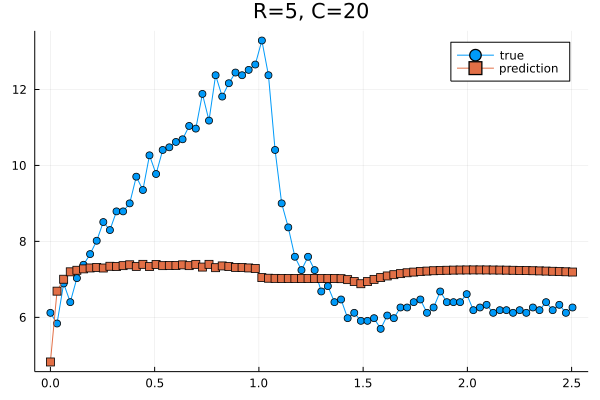

In [43]:
plot_sequences(dataset, models, ks, :test, seed = 10)

This is only for the case of viewing the notebook which will not render and save the images and will not visualize it on Github.

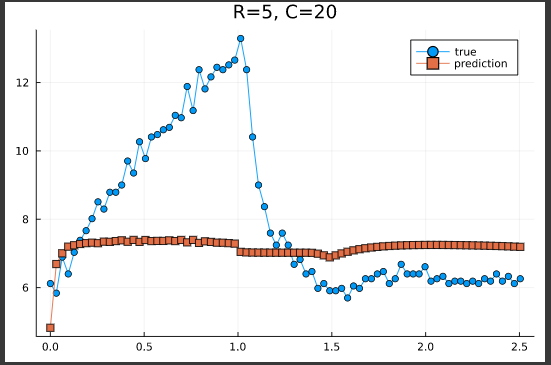

This does not look so good, does it? Well, we have not trained the models enough and they might even not be large enough.

Let's load some already trained model and compare the results.

In [30]:
using BSON
trained_models = BSON.load(datadir("good_models.bson"))[:models]

Dict{Symbol, Any} with 9 entries:
  Symbol("R=5, C=20")  => Chain(Recur(GRUCell(42, 32)), Dense(32, 32, elu), Den…
  Symbol("R=50, C=20") => Chain(Recur(GRUCell(42, 32)), Dense(32, 32, elu), Den…
  Symbol("R=5, C=10")  => Chain(Recur(GRUCell(42, 32)), Dense(32, 32, elu), Den…
  Symbol("R=20, C=50") => Chain(Recur(GRUCell(42, 32)), Dense(32, 32, elu), Den…
  Symbol("R=20, C=10") => Chain(Recur(GRUCell(42, 32)), Dense(32, 32, elu), Den…
  Symbol("R=50, C=50") => Chain(Recur(GRUCell(42, 32)), Dense(32, 32, elu), Den…
  Symbol("R=20, C=20") => Chain(Recur(GRUCell(42, 32)), Dense(32, 32, elu), Den…
  Symbol("R=5, C=50")  => Chain(Recur(GRUCell(42, 32)), Dense(32, 32, elu), Den…
  Symbol("R=50, C=10") => Chain(Recur(GRUCell(42, 32)), Dense(32, 32, elu), Den…

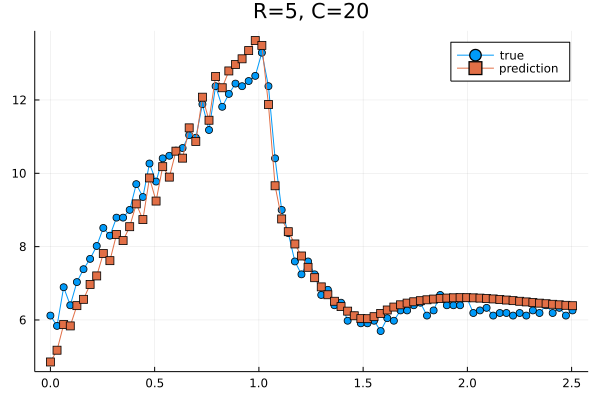

In [44]:
plot_sequences(dataset, trained_models, ks, :test, seed = 10)

This is only for the case of viewing the notebook which will not render and save the images and will not visualize it on Github.

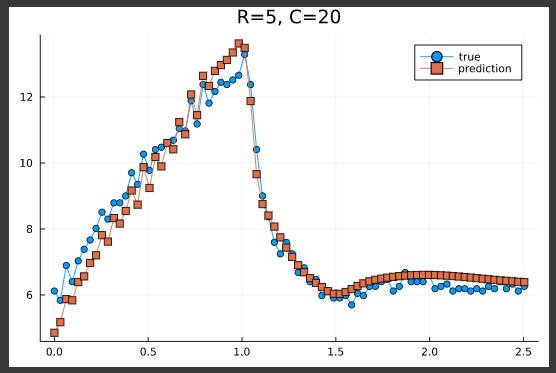

I guess that looks much better!

And that is everything from the demo! Thanks for your attention and patience and see you at the presentations.

For a table of summary of current results, look below.

# SUMMARY RESULTS (for all models tried)

The overview of models can be found at https://github.com/masenka31/Ventilator/tree/master/Ventilator.jl/scripts. Here we present only a summary table of the best results achieved for which models.

The 9 models are not yet calculated, will be in the next 24 hours (currently running on Helios).

## Results table

| model | best validation score | test score | train hours |
| --- | --- | --- | --- |
| vector - idim = 162 | 0.992 | 1.01 | 12 |
| vector - idim = 162 (u_out = 0 with ⁍) | 0.999 | 1.017 | 12 |
| simple RNN - idim = 5 | 0.933 | 0.911 | 24 |
| RNN onehot - idim = 9 | 0.769 | 0.757 | 48 |
| RNN onehot engineered - idim = 45 | 0.713 | 0.703 | 48 |
| RNN lagged - idim = 45 | 1.09 | 1.076 | 14 |
| 9 models - idim = 42 |  |  | 24 (x9 threads) |

As can be seen, the best results currently achieved are with RNN model and feature engineering achieving 0.703 MAE on test dataset.